In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, GlobalMaxPool1D, Input, Flatten, MaxPooling1D, SpatialDropout1D, Activation

from keras.callbacks import EarlyStopping

from numpy import array
from sklearn.metrics import classification_report

import gensim
from gensim import models
from gensim.models import Word2Vec
# import fasttext.util
import pandas as pd
import numpy as np

In [3]:
train_dataset = pd.read_csv("/content/drive/MyDrive/Research/Shared Task/Violence Inciting Text Detection (VITD) Bangla/dataset/task datasets/original/train.csv")
val_dataset = pd.read_csv("/content/drive/MyDrive/Research/Shared Task/Violence Inciting Text Detection (VITD) Bangla/dataset/task datasets/original/dev.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/Research/Shared Task/Violence Inciting Text Detection (VITD) Bangla/dataset/task datasets/original/test.csv")

In [4]:
train_x = train_dataset['text']
train_y = train_dataset['label']

val_x = val_dataset['text']
val_y = val_dataset['label']

test_x = test_dataset['text']
test_y = test_dataset['label']

In [5]:
tokenizer=Tokenizer(oov_token = "<OOV>", split=' ') # Splitting text based on whitespace and adding "Out of vocabulary"
tokenizer.fit_on_texts(train_x) # Using the tokenizer on out train dataset to tokenize the train dataset
train_encoded=tokenizer.texts_to_sequences(train_x)
# print(train_encoded)


In [6]:
train_padded= pad_sequences(train_encoded, padding='post', maxlen=256)
# print(train_padded)

In [7]:
train_padded.shape[1]

256

In [8]:
# padding df_test
test_encoded=tokenizer.texts_to_sequences(test_x)
test_padded= pad_sequences(test_encoded, padding='post', maxlen=train_padded.shape[1])

In [9]:
# padding df_validation
val_encoded=tokenizer.texts_to_sequences(val_x)
val_padded= pad_sequences(val_encoded, padding='post', maxlen=train_padded.shape[1])

In [10]:
model_path = "/content/drive/MyDrive/Research/Shared Task/Violence Inciting Text Detection (VITD) Bangla/notebooks/Tariq/final/bilstm70.h5"
# model_path = "/content/drive/MyDrive/Research/Shared Task/Violence Inciting Text Detection (VITD) Bangla/notebooks/Tariq/final/GRU69.h5"
# model_path = "/content/drive/MyDrive/Research/Shared Task/Violence Inciting Text Detection (VITD) Bangla/notebooks/Tariq/final/LSTM69.h5"


In [11]:
# Import the necessary libraries
import tensorflow as tf
from tensorflow import keras

# Load the saved model
loaded_model = keras.models.load_model(model_path)



# Make predictions using the loaded model
prediction = loaded_model.predict(test_padded)

# Round the predictions (if needed)
p = []
for i in range(len(prediction)):
    a = []
    for j in range(3):
        a.append(round(prediction[i][j]))
    p.append(a)

# Now, 'p' contains the rounded predictions for your input data.


63/63 [==============================] - 25s 384ms/step


In [12]:
# Determine the maximum column index for each row
max_indices = np.argmax(p, axis=1)

# Create a DataFrame with the max_indices
pred_labels = pd.DataFrame({'Value': max_indices})

In [13]:
from sklearn.metrics import classification_report

target_names = ['Non', 'Passive', 'Direct']
r = classification_report(test_y, pred_labels, output_dict=True)

In [14]:
df = pd.DataFrame(r)

# Transpose the DataFrame
df = df.transpose()

print(df)

              precision    recall  f1-score      support
0              0.769616  0.841241  0.803836  1096.000000
1              0.740196  0.630042  0.680691   719.000000
2              0.621359  0.636816  0.628993   201.000000
accuracy       0.745536  0.745536  0.745536     0.745536
macro avg      0.710390  0.702700  0.704507  2016.000000
weighted avg   0.744342  0.745536  0.742485  2016.000000


In [15]:
from sklearn.metrics import confusion_matrix

# Define your true labels and predicted labels
true_labels = test_y
predicted_labels = pred_labels['Value']

# Create the confusion matrix
confusion_matrix_result = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix_result)


Confusion Matrix:
[[922 130  44]
 [232 453  34]
 [ 44  29 128]]


In [16]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Define the font size
# font_size = 16

# # Create the confusion matrix
# confusion_matrix_result = confusion_matrix(true_labels, predicted_labels)

# # Create a heatmap for the confusion matrix with increased font size and a greenish colormap
# plt.figure(figsize=(8, 6))
# heatmap = sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='YlGn', cbar=False,
#                       xticklabels=target_names, yticklabels=target_names, annot_kws={"size": font_size})

# # Add a border around the heatmap
# for _, spine in heatmap.spines.items():
#     spine.set_visible(True)
#     spine.set_linewidth(2)
#     spine.set_edgecolor('black')

# heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=font_size)
# heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=font_size)
# plt.xlabel('Predicted Labels', fontsize=font_size)
# plt.ylabel('True Labels', fontsize=font_size)
# plt.title('Confusion Matrix', fontsize=font_size)
# plt.show()


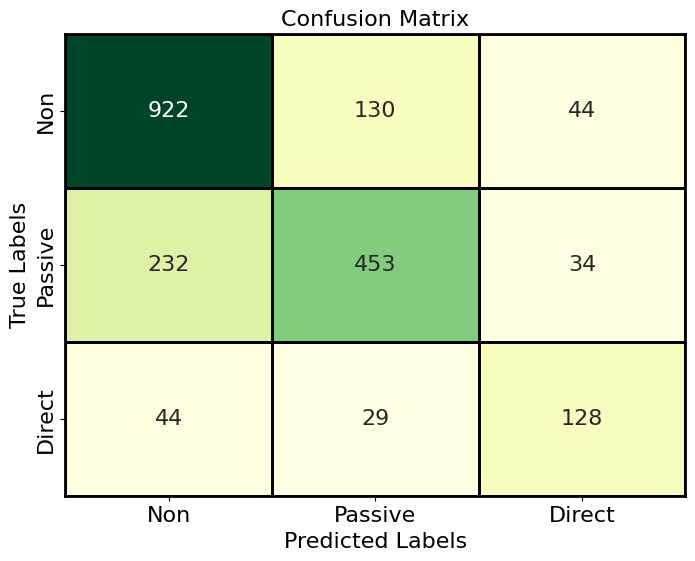

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the font size
font_size = 16

# Create the confusion matrix
confusion_matrix_result = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap for the confusion matrix with increased font size and a greenish colormap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='YlGn', cbar=False,
                      xticklabels=target_names, yticklabels=target_names, annot_kws={"size": font_size})

# Add a border around the heatmap
for _, spine in heatmap.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)
    spine.set_edgecolor('black')

# Add outlines to individual cells
ax = plt.gca()
for i in range(len(target_names)):
    for j in range(len(target_names)):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=2))

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=font_size)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=font_size)
plt.xlabel('Predicted Labels', fontsize=font_size)
plt.ylabel('True Labels', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size)
plt.show()
